# Introduction
<hr style="border:2px solid black"> </hr>

<div class="alert alert-warning">
<font color=black>

**What?** Testing several functions

</font>
</div>

# Import modules
<hr style="border:2px solid black"> </hr>

In [1]:
import numpy as np
import sys
from KPT.Modules import Modules
from KPT.Modelling import Modelling
from KPT.PreProcessing import PreProcessing
from KPT.PostProcessing import PostProcessing
M = Modules()

# General notes
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- The most challenging part in this notebook is the choice of the ANN architecture.
- It is known that ANNs are universal approximators but there are no rules detailing how many hidden layers and neurons to use.

</font>
</div>

# Loop function
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- This function takes care of the following:
    - Read in the input as x and y
    - Plot the step function
    - Split the dataset
    - Prepare the inputs
    - Define the hifh-level architecture
    - Isntantiate and build the model
    - Check model
    - Train the model
    - Postprocess the model

</font>
</div>

In [37]:
import os
# Deleting previous logging files    
if os.path.exists("./Log_Keras.log"):
    os.remove("./Log_Keras.log")
if os.path.exists("./Log_PyTorch.log"):
    os.remove("./Log_PyTorch.log")

In [38]:
def retrofit(x, y, architecture, framework, verbose=False, lr=0.001, patience=20, epoch=250):
    """Retrofit.

    This function takes care of the whole loop:
    from the ingestion of the tst function to the
    plotting of the results.
    """
    
    if "keras" in framework:    
        # Instantiate the PreProcessing object
        PP = PreProcessing(x, y, log_file_name="Log_Keras")
        # Split dataset        
        splitSet = PP.split_dataset(method=3, test_size=0.2)        
        PP.plot_test_function()

        SetK = PP.prepare_input("Keras", batch_size=64)
        ModelK = Modelling(PP)
        modelK = ModelK.build_model("keras", architecture, No_feature=1)
        ModelK.summary()
        ModelK.train(verbose=verbose, lr=lr, patience=patience, epoch=epoch)
        PP_K = PostProcessing(ModelK)
        PP_K.get_metrics()
        PP_K.plot_learning_curve()
        PP_K.plot_final_result(["test"])

    if "pytorch" in framework:
        # Instantiate the PreProcessing object
        PP = PreProcessing(x, y, log_file_name="Log_PyTorch")
        # Split dataset
        splitSet = PP.split_dataset(method=3, test_size=0.2)
        PP.plot_test_function()
        
        SetPT = PP.prepare_input("PyTorch", batch_size=64)
        ModelPT = Modelling(PP)
        modelPT = ModelPT.build_model("PyTorch", architecture, No_feature=1)
        ModelPT.summary()
        ModelPT.train(verbose=verbose, lr=lr, patience=patience, epoch=epoch)
        PP_PT = PostProcessing(ModelPT)
        PP_PT.get_metrics()
        PP_PT.plot_learning_curve()
        PP_PT.plot_final_result(["test"])

# Function #1
<hr style="border:2px solid black"> </hr>

In [39]:
# Define test function and its domain
x = np.linspace(0, 10, 500)
y = np.sin(x)

Checking ORIGINAL dimensions: 500, 500
Checking VALIDATION set dimensions: 80, 80
Checking TEST set dimensions: 100, 100
Checking TRAIN set dimensions: 320, 320
split_dataset was executed in: 0.006 [sec(s)]
plot_test_function was executed in: 0.027 [sec(s)]
prepare_input was executed in: 3.194 [sec(s)]
 
Provided architecture
Layer No. 1 is defined as: ['Dense', 200, 'ReLu']
Layer No. 2 is defined as: ['Dense', 100, 'ReLu']
Layer No. 3 is defined as: ['Dense', 100, 'ReLu']
Layer No. 4 is defined as: ['Dense', 1]
 

-> Adding layer: ['Dense', 200, 'ReLu']
200 ReLu 1
-> Adding linear layer with neurons No: 200

-> Adding layer: ['Dense', 100, 'ReLu']
100 ReLu 1
-> Adding linear layer with neurons No: 100

-> Adding layer: ['Dense', 100, 'ReLu']
100 ReLu 1
-> Adding linear layer with neurons No: 100

-> Adding layer: ['Dense', 1]
Adding LAST linear layer with neurons No: 1
Model was successfully built!
build_model was executed in: 0.072 [sec(s)]
Printing is available on console ONLY!
summ

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 200)               400       
_________________________________________________________________
dense_29 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_30 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 101       
Total params: 30,701
Trainable params: 30,701
Non-trainable params: 0
_________________________________________________________________
None


train was executed in: 4.816 [sec(s)]
[MSE]_keras: 0.0013
[RMSE]_keras: 0.0354
[MAE]_keras: 0.0241
[R2]_keras: 0.9976
get_metrics was executed in: 0.079 [sec(s)]
plot_learning_curve was executed in: 0.029 [sec(s)]
plot_final_result was executed in: 0.063 [sec(s)]


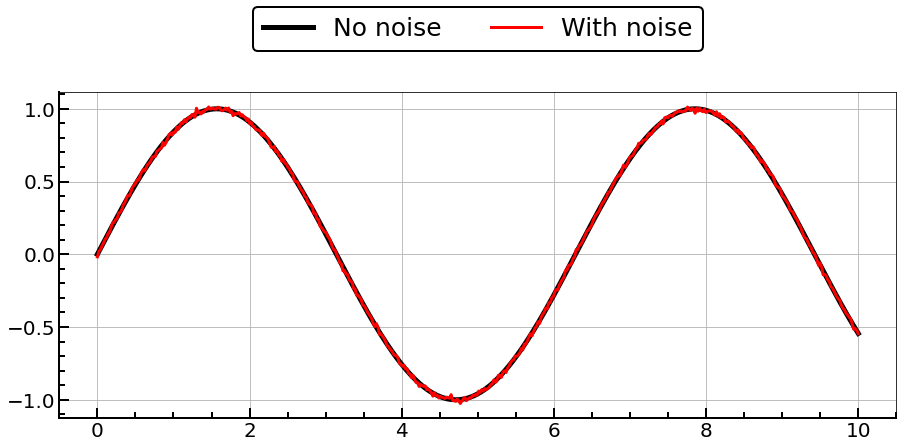

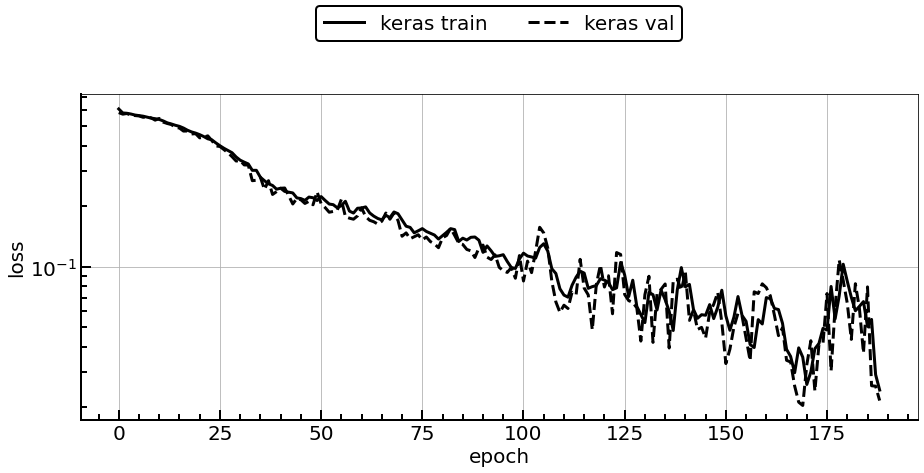

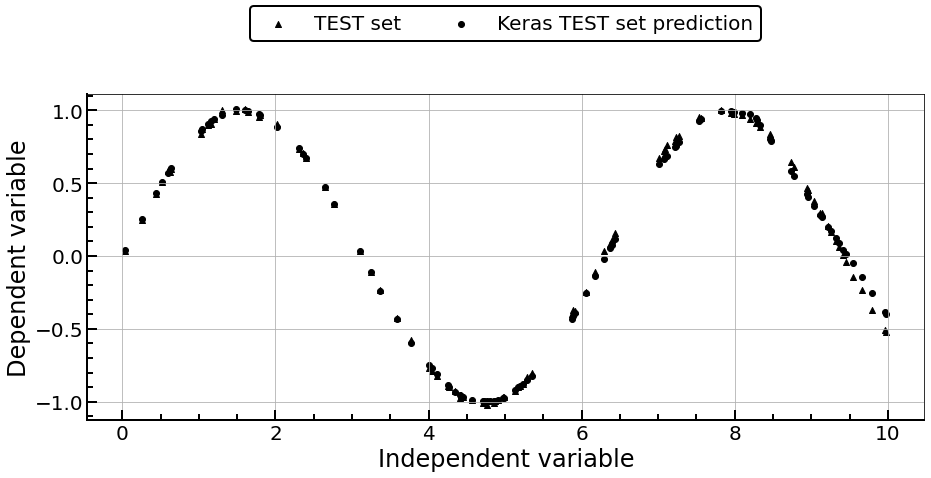

In [40]:
# Defined the high level view architecture
architecture = [
    ["Dense", 200, "ReLu"],
    ["Dense", 100, "ReLu"],
    ["Dense", 100, "ReLu"],
    ["Dense", 1]
]
retrofit(x, y, architecture, ["keras"],
         verbose=False, lr=0.001, patience=20, epoch=250)

Checking ORIGINAL dimensions: 500, 500
Checking VALIDATION set dimensions: 80, 80
Checking TEST set dimensions: 100, 100
Checking TRAIN set dimensions: 320, 320
split_dataset was executed in: 0.006 [sec(s)]
plot_test_function was executed in: 0.026 [sec(s)]
prepare_input was executed in: 0.000 [sec(s)]
 
Provided architecture
Layer No. 1 is defined as: ['Dense', 200, 'ReLu']
Layer No. 2 is defined as: ['Dense', 100, 'ReLu']
Layer No. 3 is defined as: ['Dense', 100, 'ReLu']
Layer No. 4 is defined as: ['Dense', 1]
 
 
-> Adding layer: ['Dense', 200, 'ReLu']
-> Adding FIRST linear layer inputs: 1 200
-> Adding activation RELU
 
-> Adding layer: ['Dense', 100, 'ReLu']
-> Adding OTHER linear layer inputs: 200 100
-> Adding activation RELU
 
-> Adding layer: ['Dense', 100, 'ReLu']
-> Adding OTHER linear layer inputs: 100 100
-> Adding activation RELU
 
-> Adding layer: ['Dense', 1]
Adding LAST linear layer inputs:100 1
Model was successfully built!
build_model was executed in: 0.029 [sec(s)]

Layer (type:depth-idx)                   Param #
Sequential                               --
├─Linear: 1-1                            400
├─ReLU: 1-2                              --
├─Linear: 1-3                            20,100
├─ReLU: 1-4                              --
├─Linear: 1-5                            10,100
├─ReLU: 1-6                              --
├─Linear: 1-7                            101
Total params: 30,701
Trainable params: 30,701
Non-trainable params: 0
EarlyStopping counter: 1 out of 20
EarlyStopping counter: 2 out of 20
EarlyStopping counter: 3 out of 20
EarlyStopping counter: 1 out of 20
EarlyStopping counter: 1 out of 20
EarlyStopping counter: 1 out of 20
EarlyStopping counter: 1 out of 20
EarlyStopping counter: 1 out of 20
EarlyStopping counter: 2 out of 20
EarlyStopping counter: 1 out of 20
EarlyStopping counter: 2 out of 20
EarlyStopping counter: 1 out of 20
EarlyStopping counter: 1 out of 20
EarlyStopping counter: 2 out of 20
EarlyStopping counter: 3 out 

train was executed in: 142.9 [sec(s)]
[MSE]_PyTorch: 0.0081
[RMSE]_PyTorch: 0.0901
[MAE]_PyTorch: 0.0574
[R2]_PyTorch: 0.9845
get_metrics was executed in: 0.008 [sec(s)]
plot_learning_curve was executed in: 0.036 [sec(s)]
plot_final_result was executed in: 0.031 [sec(s)]


EarlyStopping counter: 20 out of 20
Early stopping
Current #104 loss 0.00289181147236377 valid_loss0.006530854385346174


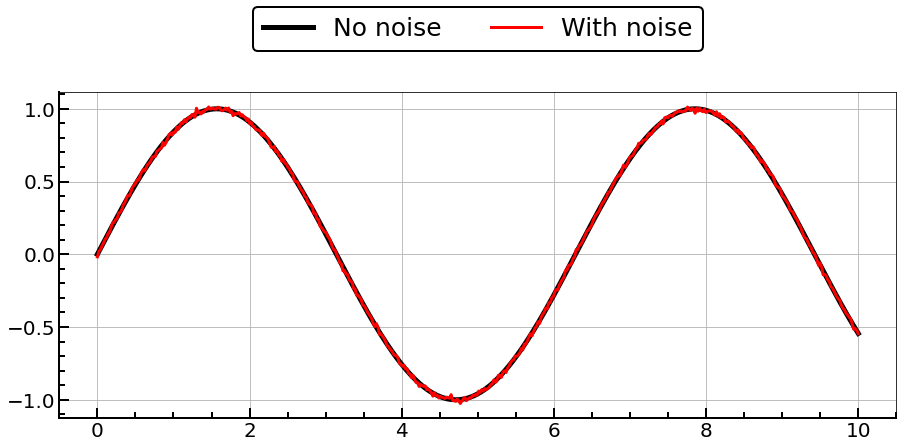

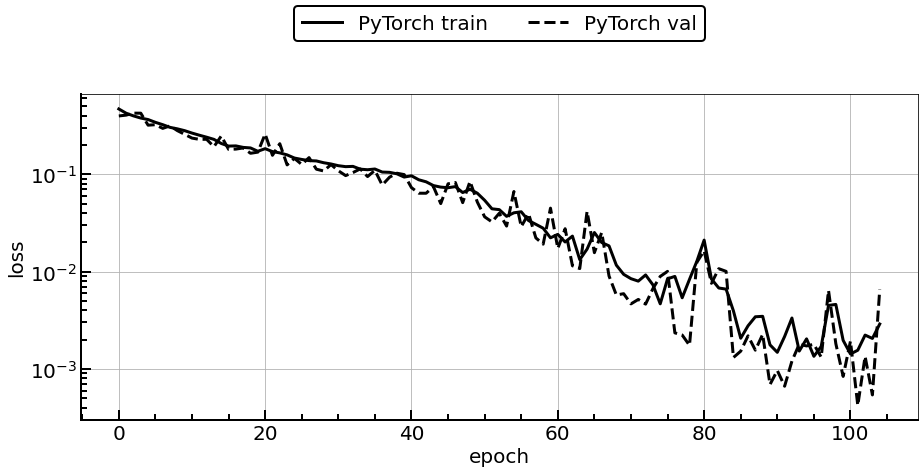

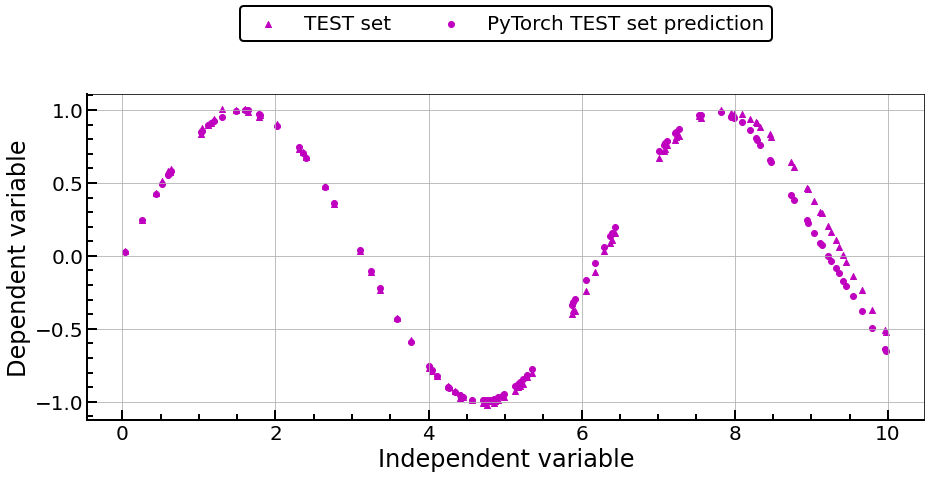

In [42]:
retrofit(x, y, architecture, ["pytorch"],
         verbose=False, lr=0.001, patience=20, epoch=250)

# Function #2
<hr style="border:2px solid black"> </hr>

In [43]:
# Define test function and its domain
x = np.linspace(0, 10, 500)
y = np.sin(x)*np.cos(x)**2

Checking ORIGINAL dimensions: 500, 500
Checking VALIDATION set dimensions: 80, 80
Checking TEST set dimensions: 100, 100
Checking TRAIN set dimensions: 320, 320
split_dataset was executed in: 0.006 [sec(s)]
plot_test_function was executed in: 0.030 [sec(s)]
prepare_input was executed in: 3.981 [sec(s)]
 
Provided architecture
Layer No. 1 is defined as: ['Dense', 400, 'ReLu']
Layer No. 2 is defined as: ['Dense', 400, 'ReLu']
Layer No. 3 is defined as: ['Dense', 400, 'ReLu']
Layer No. 4 is defined as: ['Dense', 400, 'ReLu']
Layer No. 5 is defined as: ['Dense', 400, 'ReLu']
Layer No. 6 is defined as: ['Dense', 1]
 

-> Adding layer: ['Dense', 400, 'ReLu']
400 ReLu 1
-> Adding linear layer with neurons No: 400

-> Adding layer: ['Dense', 400, 'ReLu']
400 ReLu 1
-> Adding linear layer with neurons No: 400

-> Adding layer: ['Dense', 400, 'ReLu']
400 ReLu 1
-> Adding linear layer with neurons No: 400

-> Adding layer: ['Dense', 400, 'ReLu']
400 ReLu 1
-> Adding linear layer with neurons No: 

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 400)               800       
_________________________________________________________________
dense_33 (Dense)             (None, 400)               160400    
_________________________________________________________________
dense_34 (Dense)             (None, 400)               160400    
_________________________________________________________________
dense_35 (Dense)             (None, 400)               160400    
_________________________________________________________________
dense_36 (Dense)             (None, 400)               160400    
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 401       
Total params: 642,801
Trainable params: 642,801
Non-trainable params: 0
________________________________________________

5/5 [==============================] - 0s 10ms/step - loss: 0.1256 - val_loss: 0.1206
Epoch 73/500
5/5 [==============================] - 0s 10ms/step - loss: 0.1237 - val_loss: 0.1244
Epoch 74/500
5/5 [==============================] - 0s 10ms/step - loss: 0.1298 - val_loss: 0.1303
Epoch 75/500
5/5 [==============================] - 0s 10ms/step - loss: 0.1275 - val_loss: 0.1274
Epoch 76/500
5/5 [==============================] - 0s 9ms/step - loss: 0.1275 - val_loss: 0.1204
Epoch 77/500
5/5 [==============================] - 0s 10ms/step - loss: 0.1248 - val_loss: 0.1361
Epoch 78/500
5/5 [==============================] - 0s 9ms/step - loss: 0.1302 - val_loss: 0.1262
Epoch 79/500
5/5 [==============================] - 0s 10ms/step - loss: 0.1257 - val_loss: 0.1173
Epoch 80/500
5/5 [==============================] - 0s 10ms/step - loss: 0.1214 - val_loss: 0.1210
Epoch 81/500
5/5 [==============================] - 0s 10ms/step - loss: 0.1211 - val_loss: 0.1202
Epoch 82/500
5/5 [=======

5/5 [==============================] - 0s 9ms/step - loss: 0.1119 - val_loss: 0.1159
Epoch 155/500
5/5 [==============================] - 0s 9ms/step - loss: 0.1227 - val_loss: 0.1182
Epoch 156/500
5/5 [==============================] - 0s 9ms/step - loss: 0.1190 - val_loss: 0.1114
Epoch 157/500
5/5 [==============================] - 0s 9ms/step - loss: 0.1160 - val_loss: 0.1140
Epoch 158/500
5/5 [==============================] - 0s 9ms/step - loss: 0.1151 - val_loss: 0.1180
Epoch 159/500
5/5 [==============================] - 0s 9ms/step - loss: 0.1142 - val_loss: 0.1093
Epoch 160/500
5/5 [==============================] - 0s 9ms/step - loss: 0.1089 - val_loss: 0.1121
Epoch 161/500
5/5 [==============================] - 0s 9ms/step - loss: 0.1139 - val_loss: 0.1103
Epoch 162/500
5/5 [==============================] - 0s 9ms/step - loss: 0.1071 - val_loss: 0.1047
Epoch 163/500
5/5 [==============================] - 0s 9ms/step - loss: 0.1082 - val_loss: 0.1057
Epoch 164/500
5/5 [=====

5/5 [==============================] - 0s 9ms/step - loss: 0.0879 - val_loss: 0.0835
Epoch 237/500
5/5 [==============================] - 0s 13ms/step - loss: 0.0849 - val_loss: 0.0873
Epoch 238/500
5/5 [==============================] - 0s 10ms/step - loss: 0.0878 - val_loss: 0.0999
Epoch 239/500
5/5 [==============================] - 0s 10ms/step - loss: 0.0995 - val_loss: 0.1005
Epoch 240/500
5/5 [==============================] - 0s 9ms/step - loss: 0.0973 - val_loss: 0.0824
Epoch 241/500
5/5 [==============================] - 0s 9ms/step - loss: 0.0877 - val_loss: 0.0801
Epoch 242/500
5/5 [==============================] - 0s 9ms/step - loss: 0.0766 - val_loss: 0.0756
Epoch 243/500
5/5 [==============================] - 0s 9ms/step - loss: 0.0841 - val_loss: 0.0724
Epoch 244/500
5/5 [==============================] - 0s 9ms/step - loss: 0.0737 - val_loss: 0.0944
Epoch 245/500
5/5 [==============================] - 0s 9ms/step - loss: 0.0986 - val_loss: 0.0927
Epoch 246/500
5/5 [==

5/5 [==============================] - 0s 10ms/step - loss: 0.0742 - val_loss: 0.0677
Epoch 319/500
5/5 [==============================] - 0s 10ms/step - loss: 0.0737 - val_loss: 0.0705
Epoch 320/500
5/5 [==============================] - 0s 10ms/step - loss: 0.0681 - val_loss: 0.0737
Epoch 321/500
5/5 [==============================] - 0s 10ms/step - loss: 0.0710 - val_loss: 0.0791
Epoch 322/500
5/5 [==============================] - 0s 9ms/step - loss: 0.0703 - val_loss: 0.0711
Epoch 323/500
5/5 [==============================] - 0s 10ms/step - loss: 0.0645 - val_loss: 0.0617
Epoch 324/500
5/5 [==============================] - 0s 10ms/step - loss: 0.0618 - val_loss: 0.0683
Epoch 325/500
5/5 [==============================] - 0s 11ms/step - loss: 0.0609 - val_loss: 0.0626
Epoch 326/500
5/5 [==============================] - 0s 9ms/step - loss: 0.0650 - val_loss: 0.0662
Epoch 327/500
5/5 [==============================] - 0s 10ms/step - loss: 0.0691 - val_loss: 0.0750
Epoch 328/500
5/

5/5 [==============================] - 0s 9ms/step - loss: 0.0598 - val_loss: 0.0704
Epoch 401/500
5/5 [==============================] - 0s 10ms/step - loss: 0.0594 - val_loss: 0.0563
Epoch 402/500
5/5 [==============================] - 0s 9ms/step - loss: 0.0556 - val_loss: 0.0727
Epoch 403/500
5/5 [==============================] - 0s 9ms/step - loss: 0.0550 - val_loss: 0.0590
Epoch 404/500
5/5 [==============================] - 0s 9ms/step - loss: 0.0569 - val_loss: 0.0606
Epoch 405/500
5/5 [==============================] - 0s 10ms/step - loss: 0.0619 - val_loss: 0.0560
Epoch 406/500
5/5 [==============================] - 0s 10ms/step - loss: 0.0540 - val_loss: 0.0625
Epoch 407/500
5/5 [==============================] - 0s 9ms/step - loss: 0.0584 - val_loss: 0.0573
Epoch 408/500
5/5 [==============================] - 0s 9ms/step - loss: 0.0563 - val_loss: 0.0558
Epoch 409/500
5/5 [==============================] - 0s 9ms/step - loss: 0.0466 - val_loss: 0.0481
Epoch 410/500
5/5 [==

5/5 [==============================] - 0s 9ms/step - loss: 0.0428 - val_loss: 0.0391
Epoch 483/500
5/5 [==============================] - 0s 9ms/step - loss: 0.0518 - val_loss: 0.0719
Epoch 484/500
5/5 [==============================] - 0s 9ms/step - loss: 0.0640 - val_loss: 0.0577
Epoch 485/500
5/5 [==============================] - 0s 9ms/step - loss: 0.0643 - val_loss: 0.0753
Epoch 486/500
5/5 [==============================] - 0s 9ms/step - loss: 0.0598 - val_loss: 0.0367
Epoch 487/500
5/5 [==============================] - 0s 14ms/step - loss: 0.0439 - val_loss: 0.0668
Epoch 488/500
5/5 [==============================] - 0s 10ms/step - loss: 0.0445 - val_loss: 0.0337
Epoch 489/500
5/5 [==============================] - 0s 9ms/step - loss: 0.0415 - val_loss: 0.0298
Epoch 490/500
5/5 [==============================] - 0s 10ms/step - loss: 0.0325 - val_loss: 0.0353
Epoch 491/500
5/5 [==============================] - 0s 10ms/step - loss: 0.0339 - val_loss: 0.0219
Epoch 492/500
5/5 [=

train was executed in: 22.96 [sec(s)]
[MSE]_keras: 0.0030
[RMSE]_keras: 0.0547
[MAE]_keras: 0.0422
[R2]_keras: 0.9399
get_metrics was executed in: 0.099 [sec(s)]
plot_learning_curve was executed in: 0.031 [sec(s)]
plot_final_result was executed in: 0.071 [sec(s)]
Checking ORIGINAL dimensions: 500, 500
Checking VALIDATION set dimensions: 80, 80
Checking TEST set dimensions: 100, 100
Checking TRAIN set dimensions: 320, 320
split_dataset was executed in: 0.007 [sec(s)]
plot_test_function was executed in: 0.027 [sec(s)]
prepare_input was executed in: 0.000 [sec(s)]
 
Provided architecture
Layer No. 1 is defined as: ['Dense', 400, 'ReLu']
Layer No. 2 is defined as: ['Dense', 400, 'ReLu']
Layer No. 3 is defined as: ['Dense', 400, 'ReLu']
Layer No. 4 is defined as: ['Dense', 400, 'ReLu']
Layer No. 5 is defined as: ['Dense', 400, 'ReLu']
Layer No. 6 is defined as: ['Dense', 1]
 
 
-> Adding layer: ['Dense', 400, 'ReLu']
-> Adding FIRST linear layer inputs: 1 400
-> Adding activation RELU
 
-> 

Layer (type:depth-idx)                   Param #
Sequential                               --
├─Linear: 1-1                            800
├─ReLU: 1-2                              --
├─Linear: 1-3                            160,400
├─ReLU: 1-4                              --
├─Linear: 1-5                            160,400
├─ReLU: 1-6                              --
├─Linear: 1-7                            160,400
├─ReLU: 1-8                              --
├─Linear: 1-9                            160,400
├─ReLU: 1-10                             --
├─Linear: 1-11                           401
Total params: 642,801
Trainable params: 642,801
Non-trainable params: 0
Epoch No: 0
Current # 0  loss 0.0782145120203495  valid_loss 0.0620928592979908
Epoch No: 1
Current # 1  loss 0.05700491070747375  valid_loss 0.07447575777769089
EarlyStopping counter: 1 out of 50
Epoch No: 2
Current # 2  loss 0.05563955679535866  valid_loss 0.0532696433365345
Epoch No: 3
Current # 3  loss 0.05899115726351738  

Current # 65  loss 0.014940261282026768  valid_loss 0.010045648319646716
Epoch No: 66
Current # 66  loss 0.022375737130641938  valid_loss 0.01675173779949546
EarlyStopping counter: 1 out of 50
Epoch No: 67
Current # 67  loss 0.03801556937396526  valid_loss 0.04042542539536953
EarlyStopping counter: 2 out of 50
Epoch No: 68
Current # 68  loss 0.04366697743535042  valid_loss 0.036128848791122437
EarlyStopping counter: 3 out of 50
Epoch No: 69
Current # 69  loss 0.03104107715189457  valid_loss 0.024179051630198956
EarlyStopping counter: 4 out of 50
Epoch No: 70
Current # 70  loss 0.0233512070029974  valid_loss 0.016493313014507294
EarlyStopping counter: 5 out of 50
Epoch No: 71
Current # 71  loss 0.019397887401282787  valid_loss 0.023952575400471687
EarlyStopping counter: 6 out of 50
Epoch No: 72
Current # 72  loss 0.022390733659267425  valid_loss 0.019497768953442574
EarlyStopping counter: 7 out of 50
Epoch No: 73
Current # 73  loss 0.02065815906971693  valid_loss 0.02145903743803501
Ear

Current # 133  loss 0.011244678869843483  valid_loss 0.01352033019065857
EarlyStopping counter: 35 out of 50
Epoch No: 134
Current # 134  loss 0.010128889326006174  valid_loss 0.012302265036851168
EarlyStopping counter: 36 out of 50
Epoch No: 135
Current # 135  loss 0.011729639489203691  valid_loss 0.012327239848673344
EarlyStopping counter: 37 out of 50
Epoch No: 136
Current # 136  loss 0.012949166074395179  valid_loss 0.02463041990995407
EarlyStopping counter: 38 out of 50
Epoch No: 137
Current # 137  loss 0.022494268231093885  valid_loss 0.022458738181740046
EarlyStopping counter: 39 out of 50
Epoch No: 138
Current # 138  loss 0.016747216694056988  valid_loss 0.010956193320453167
EarlyStopping counter: 40 out of 50
Epoch No: 139
Current # 139  loss 0.01381269246339798  valid_loss 0.012632445897907019
EarlyStopping counter: 41 out of 50
Epoch No: 140
Current # 140  loss 0.011466533131897449  valid_loss 0.012980158440768719
EarlyStopping counter: 42 out of 50
Epoch No: 141
Current # 1

train was executed in: 211.9 [sec(s)]
[MSE]_PyTorch: 0.0078
[RMSE]_PyTorch: 0.0881
[MAE]_PyTorch: 0.0608
[R2]_PyTorch: 0.8480
get_metrics was executed in: 0.010 [sec(s)]
plot_learning_curve was executed in: 0.036 [sec(s)]
plot_final_result was executed in: 0.030 [sec(s)]


Current # 148  loss 0.007938161678612232  valid_loss 0.007340144831687212
EarlyStopping counter: 50 out of 50
Early stopping
Current #148 loss 0.007938161678612232 valid_loss0.007340144831687212


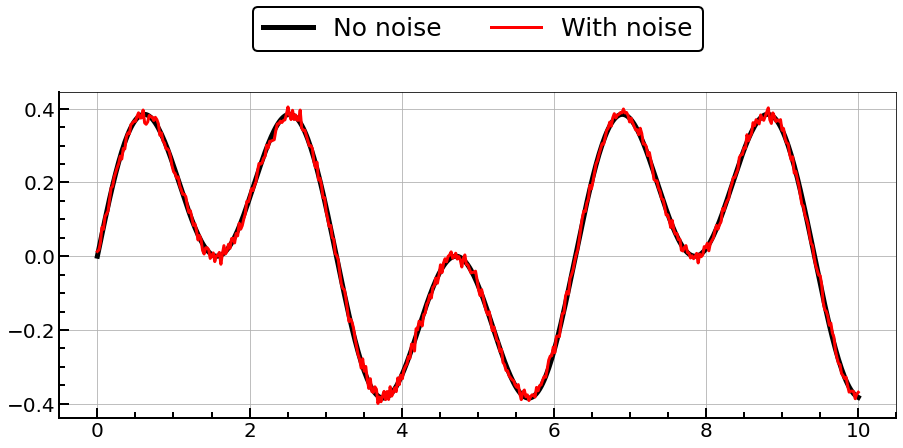

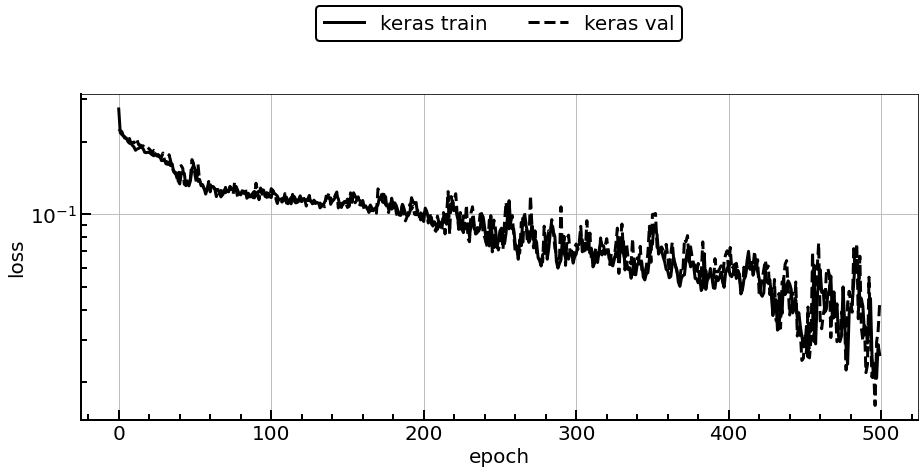

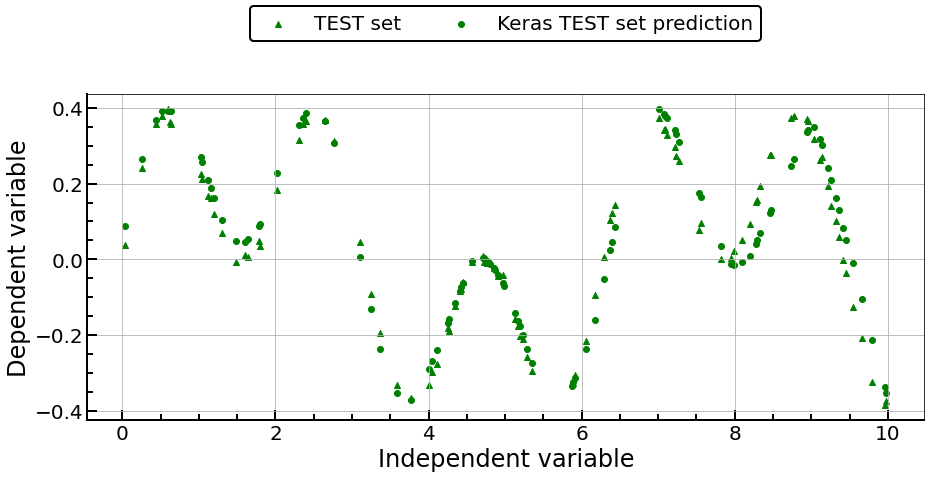

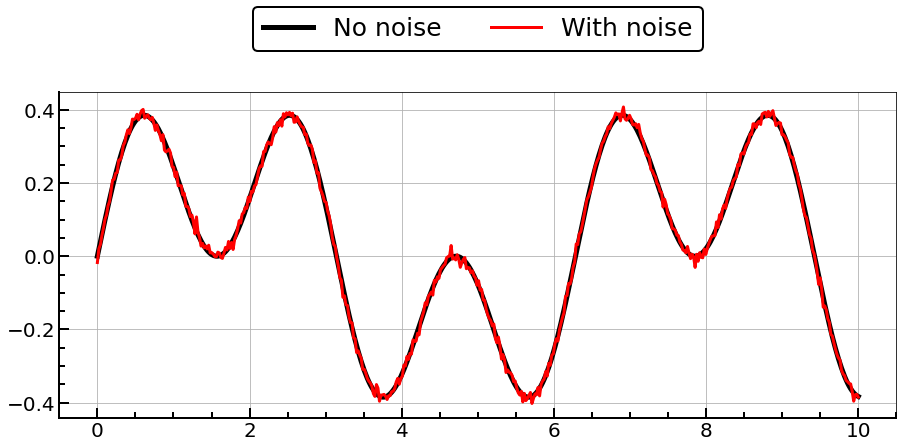

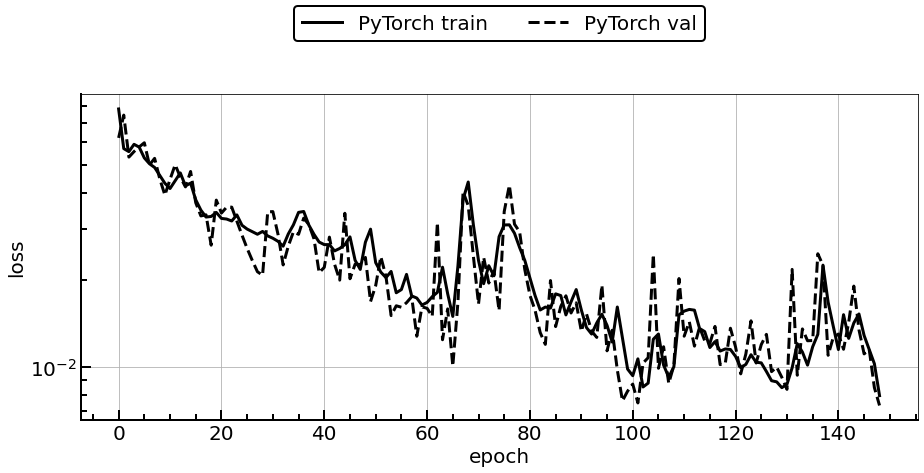

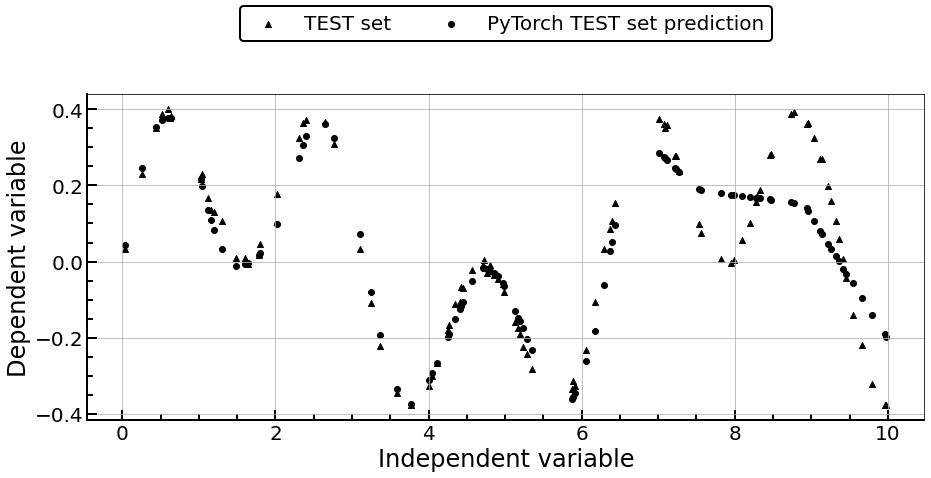

In [44]:
# Defined the high level view architecture
architecture = [
    ["Dense", 400, "ReLu"],
    ["Dense", 400, "ReLu"],
    ["Dense", 400, "ReLu"],
    ["Dense", 400, "ReLu"],
    ["Dense", 400, "ReLu"],
    ["Dense", 1]
]
retrofit(x, y, architecture, ["keras", "pytorch"],
         verbose=True, lr=0.001, patience=50, epoch=500)

# Function #3
<hr style="border:2px solid black"> </hr>

In [45]:
# Define test function and its domain
x = np.linspace(0, 5, 500)
y = np.tanh(x)

Checking ORIGINAL dimensions: 500, 500
Checking VALIDATION set dimensions: 80, 80
Checking TEST set dimensions: 100, 100
Checking TRAIN set dimensions: 320, 320
split_dataset was executed in: 0.006 [sec(s)]
plot_test_function was executed in: 0.031 [sec(s)]
prepare_input was executed in: 4.291 [sec(s)]
 
Provided architecture
Layer No. 1 is defined as: ['Dense', 200, 'ReLu']
Layer No. 2 is defined as: ['Dense', 100, 'ReLu']
Layer No. 3 is defined as: ['Dense', 100, 'ReLu']
Layer No. 4 is defined as: ['Dense', 1]
 

-> Adding layer: ['Dense', 200, 'ReLu']
200 ReLu 1
-> Adding linear layer with neurons No: 200

-> Adding layer: ['Dense', 100, 'ReLu']
100 ReLu 1
-> Adding linear layer with neurons No: 100

-> Adding layer: ['Dense', 100, 'ReLu']
100 ReLu 1
-> Adding linear layer with neurons No: 100

-> Adding layer: ['Dense', 1]
Adding LAST linear layer with neurons No: 1
Model was successfully built!
build_model was executed in: 0.104 [sec(s)]
Printing is available on console ONLY!
summ

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 200)               400       
_________________________________________________________________
dense_39 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_40 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 101       
Total params: 30,701
Trainable params: 30,701
Non-trainable params: 0
_________________________________________________________________
None


train was executed in: 1.907 [sec(s)]
[MSE]_keras: 0.0001
[RMSE]_keras: 0.0114
[MAE]_keras: 0.0093
[R2]_keras: 0.9975
get_metrics was executed in: 0.081 [sec(s)]
plot_learning_curve was executed in: 0.030 [sec(s)]
plot_final_result was executed in: 0.066 [sec(s)]
Checking ORIGINAL dimensions: 500, 500
Checking VALIDATION set dimensions: 80, 80
Checking TEST set dimensions: 100, 100
Checking TRAIN set dimensions: 320, 320
split_dataset was executed in: 0.005 [sec(s)]
plot_test_function was executed in: 0.024 [sec(s)]
prepare_input was executed in: 0.000 [sec(s)]
 
Provided architecture
Layer No. 1 is defined as: ['Dense', 200, 'ReLu']
Layer No. 2 is defined as: ['Dense', 100, 'ReLu']
Layer No. 3 is defined as: ['Dense', 100, 'ReLu']
Layer No. 4 is defined as: ['Dense', 1]
 
 
-> Adding layer: ['Dense', 200, 'ReLu']
-> Adding FIRST linear layer inputs: 1 200
-> Adding activation RELU
 
-> Adding layer: ['Dense', 100, 'ReLu']
-> Adding OTHER linear layer inputs: 200 100
-> Adding activati

Layer (type:depth-idx)                   Param #
Sequential                               --
├─Linear: 1-1                            400
├─ReLU: 1-2                              --
├─Linear: 1-3                            20,100
├─ReLU: 1-4                              --
├─Linear: 1-5                            10,100
├─ReLU: 1-6                              --
├─Linear: 1-7                            101
Total params: 30,701
Trainable params: 30,701
Non-trainable params: 0
EarlyStopping counter: 1 out of 20
EarlyStopping counter: 2 out of 20
EarlyStopping counter: 3 out of 20
EarlyStopping counter: 4 out of 20
EarlyStopping counter: 5 out of 20
EarlyStopping counter: 6 out of 20
EarlyStopping counter: 7 out of 20
EarlyStopping counter: 8 out of 20
EarlyStopping counter: 9 out of 20
EarlyStopping counter: 10 out of 20
EarlyStopping counter: 11 out of 20
EarlyStopping counter: 12 out of 20
EarlyStopping counter: 13 out of 20
EarlyStopping counter: 14 out of 20
EarlyStopping counter: 1

train was executed in: 37.82 [sec(s)]
[MSE]_PyTorch: 0.0001
[RMSE]_PyTorch: 0.0113
[MAE]_PyTorch: 0.0088
[R2]_PyTorch: 0.9975
get_metrics was executed in: 0.005 [sec(s)]
plot_learning_curve was executed in: 0.039 [sec(s)]
plot_final_result was executed in: 0.027 [sec(s)]


EarlyStopping counter: 20 out of 20
Early stopping
Current #26 loss 0.00011056836665375158 valid_loss7.868965622037649e-05


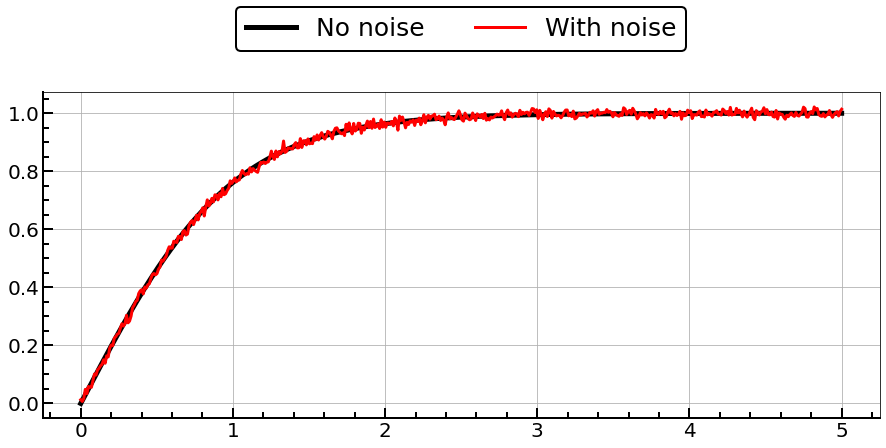

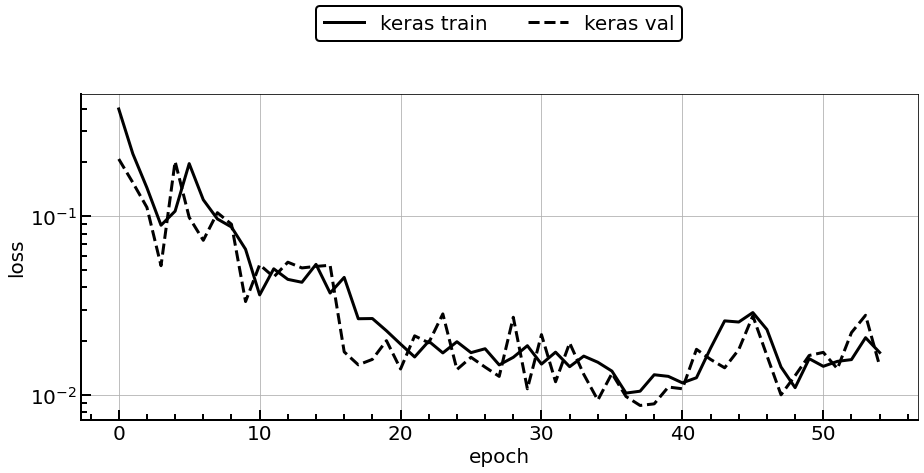

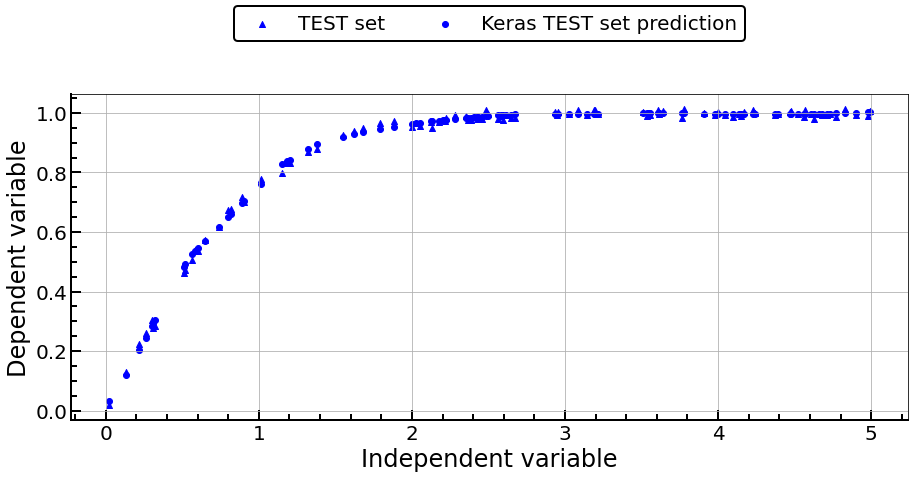

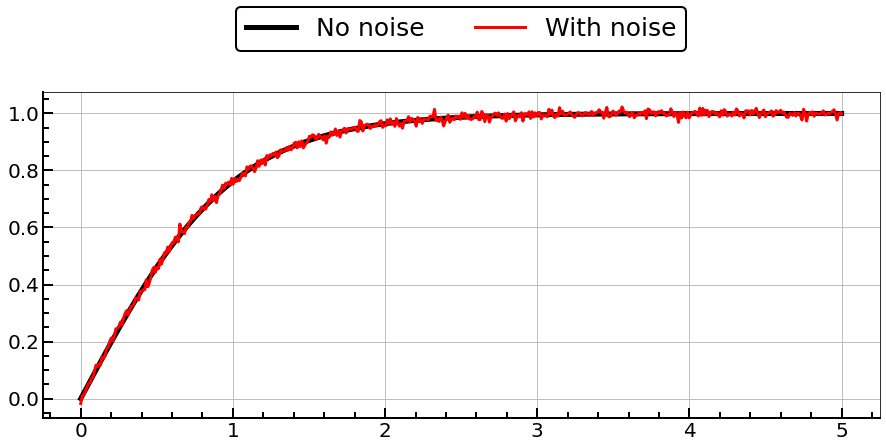

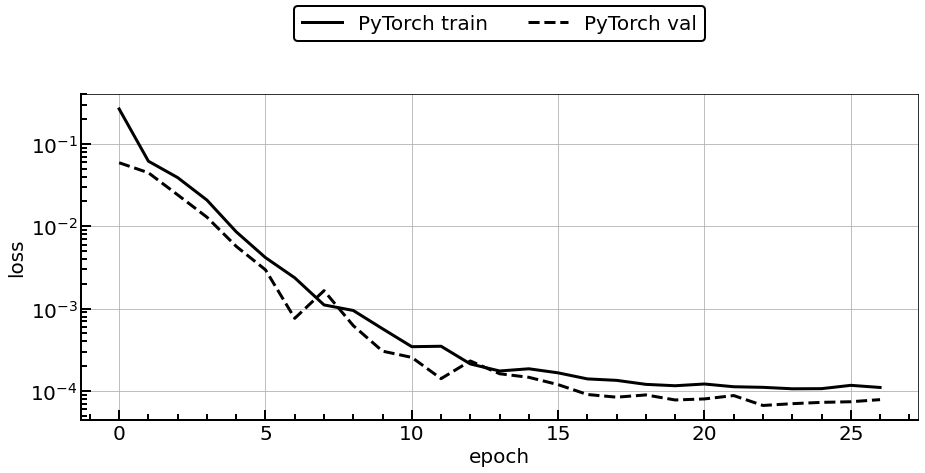

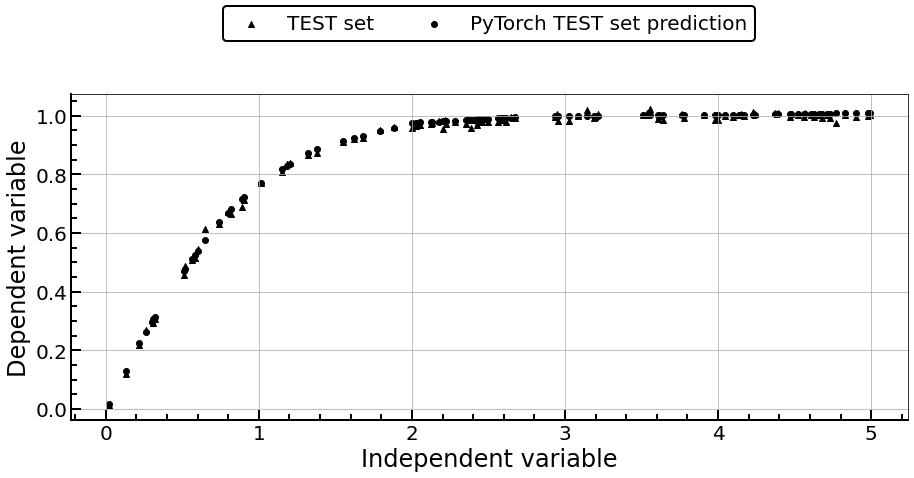

In [46]:
# Define the high level view architecture
architecture = [
    ["Dense", 200, "ReLu"],
    ["Dense", 100, "ReLu"],
    ["Dense", 100, "ReLu"],
    ["Dense", 1]
]
retrofit(x, y, architecture, ["pytorch", "keras"],
         verbose=False, lr=0.005, patience=20, epoch=250)